# Data Pre-processing

* Load, clean-up and manipulate data to prep for analysis

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os

csv_list = []
# append csv file names into an empty list to be iterated through afterwards
for files in sorted(os.listdir("csse_covid19_daily_us/.")):
    if files.endswith(".csv"):
        csv_list.append(files)
        
# check if it appended correctly to csv_list
print(len(csv_list))
csv_list[:5]

100


['04-12-2020.csv',
 '04-13-2020.csv',
 '04-14-2020.csv',
 '04-15-2020.csv',
 '04-16-2020.csv']

In [3]:
# iterate through csv_list and read_csv > set dates as dict keys > daily data as vals
feature_list = ['Province_State', 'Last_Update', 'Confirmed', 'Deaths', 
                'Recovered', 'Active', 'People_Tested', 'Testing_Rate', 
                'Mortality_Rate', 'Incident_Rate']
 
# datetime_idx = pd.DatetimeIndex([filename[0:-4] for filename in csv_list])
daily_states_dict = {}

for i in range(len(csv_list)):
    csv_str = 'csse_covid19_daily_us/'+csv_list[i]
    today_df = pd.read_csv(csv_str, sep=',')
    filter_df = today_df[feature_list]
    daily_states_dict[i] = filter_df

if len(daily_states_dict) == 100:
    print("Appended all 100 days and corresponding dataframes.")
else:
    print("Loop didn't work correctly.")


Appended all 100 days and corresponding dataframes.


In [4]:
# look over one dataframe
apr12 = daily_states_dict[0]
print(apr12.info())
print("\nLooking over unfamiliar names:", apr12.Province_State.unique(), sep='\n\n')
print("\nColumns with NaNs: ", apr12.isnull().sum(), sep='\n\n')
apr12.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province_State  59 non-null     object 
 1   Last_Update     56 non-null     object 
 2   Confirmed       59 non-null     int64  
 3   Deaths          59 non-null     int64  
 4   Recovered       29 non-null     float64
 5   Active          59 non-null     int64  
 6   People_Tested   56 non-null     float64
 7   Testing_Rate    56 non-null     float64
 8   Mortality_Rate  57 non-null     float64
 9   Incident_Rate   56 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 4.7+ KB
None

Looking over unfamiliar names:

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Diamond Princess' 'District of Columbia'
 'Florida' 'Georgia' 'Grand Princess' 'Guam' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' '

,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active,People_Tested,Testing_Rate,Mortality_Rate,Incident_Rate
0,Alabama,2020-04-12 23:18:15,3563,93,NaN,3470,21583.0,460.300152,2.610160,75.988020
1,Alaska,2020-04-12 23:18:15,272,8,66.0,264,8038.0,1344.711576,2.941176,45.504049
2,Arizona,2020-04-12 23:18:15,3542,115,NaN,3427,42109.0,578.522286,3.246753,48.662422
3,Arkansas,2020-04-12 23:18:15,1280,27,367.0,1253,19722.0,761.753354,2.109375,49.439423
4,California,2020-04-12 23:18:15,22795,640,NaN,22155,190328.0,485.423868,2.812020,58.137726
5,Colorado,2020-04-12 23:18:15,7307,289,NaN,7018,34873.0,615.389991,3.955112,128.943729
6,Connecticut,2020-04-12 23:18:15,12035,554,NaN,11481,41220.0,1156.148159,4.603241,337.560483
7,Delaware,2020-04-12 23:18:15,1625,35,191.0,1590,11103.0,1140.214672,2.153846,166.878217
8,Diamond Princess,2020-04-12 23:18:15,49,0,0.0,49,NaN,NaN,0.000000,NaN
9,District of Columbia,2020-04-12 23:18:15,1875,50,493.0,1825,10640.0,1507.618148,2.666667,265.675190


In [5]:
nodate_states = apr12.loc[apr12['Last_Update'].isnull()==True, 'Province_State'].unique()
print("\nMissing date count: ", apr12['Last_Update'].isnull().sum(), end='\n\n')
[print(state, apr12[apr12.Province_State ==state].index[0], sep=', ') for state in nodate_states]
print('\nLast row index: ',len(apr12))



Missing date count:  3

American Samoa, 55
Recovered, 57
Virgin Islands, 58

Last row index:  59


<p> Missin dates can be filled with 'ffill' (or 'bfill'), since none of them are first or last row.

##### Cleaning tasks:
* [x] Rename columns
* [x] Delete rows where 'Province_State' == 'Diamond Princess', 'Grand Princess', or 'Recovered'
* [x] Fill 'Last_Update' with 'ffill', and fill rest of the columns with NaNs with 0
* [x] Convert 'Last_Update' to datetime format '%Y-%m-%d'

<br><br>
Create a function to iterate through all the dataframes in the dictionary to complete all cleaning process
<br><br>
**Note**: <p>Previously, I've concatenated all datasets together prior to doing all of the cleaning and aggregations, but it seems to look more clean and rather feels faster(?) in processing by utilizing my defined functions.</p>

In [6]:
def dict_apply_all(dictionary, func):
    """ takes in dictionary where values are single dataframes,
    and returns a new dictionary which specified function is
    applied to all of its dataframes
    
    params: 
        dictionary(dict): values are Pandas dataframes
        func(function): function that can be applied to a single
                        Pandas dataframe
                        
    returs:
        dictionary_2(dict): new dictionary where keys remain same,
                            while a func is applied to df values.
    """
    dictionary_2 = dictionary.copy()
    for key, val in dictionary.items():
        dictionary_2[key] = func(val)
    
    return dictionary_2

In [7]:

def drop_and_fill(data):
    """takes in a dataframe to clean up, drop unwanted rows, 
    fill nulls, rename columns, and converts proper date format
    
    param: data(Pandas dataframe), single, unrevised dataframe
    
    returns: data_(Pandas dataframe) dataframe cleaned and 
            filtered for exploratory data analysis
    """
    dropper_list = ['Diamond Princess', 'Grand Princess', 'Recovered']
    
    data_ = data.copy()
    data_.columns = data_.columns.str.lower()
    data_.rename(columns={'province_state':'state'}, 
                 inplace=True)
    data_.set_index('state', drop=False, inplace=True)
    data_['date'] = pd.to_datetime(data_['last_update']).dt.strftime('%Y-%m-%d')
    data_.drop('last_update', axis=1, inplace=True)
    
    for dropper in dropper_list:
        if dropper in data_.index:
            data_.drop(labels=dropper, 
                       axis=0, 
                       inplace=True)
    
    for cols in data_:
        if cols != 'date':
            data_[cols].fillna(0, inplace=True)
        else:
            data_[cols].fillna(method='ffill', 
                               inplace=True)
            
    data_.reset_index(drop=True, inplace=True)
    
    return data_

In [8]:
clean_d = dict_apply_all(daily_states_dict, drop_and_fill)

In [9]:
apr12 = clean_d[0]
apr12.head(10)

,state,confirmed,deaths,recovered,active,people_tested,testing_rate,mortality_rate,incident_rate,date
0,Alabama,3563,93,0.0,3470,21583.0,460.300152,2.610160,75.988020,2020-04-12
1,Alaska,272,8,66.0,264,8038.0,1344.711576,2.941176,45.504049,2020-04-12
2,Arizona,3542,115,0.0,3427,42109.0,578.522286,3.246753,48.662422,2020-04-12
3,Arkansas,1280,27,367.0,1253,19722.0,761.753354,2.109375,49.439423,2020-04-12
4,California,22795,640,0.0,22155,190328.0,485.423868,2.812020,58.137726,2020-04-12
5,Colorado,7307,289,0.0,7018,34873.0,615.389991,3.955112,128.943729,2020-04-12
6,Connecticut,12035,554,0.0,11481,41220.0,1156.148159,4.603241,337.560483,2020-04-12
7,Delaware,1625,35,191.0,1590,11103.0,1140.214672,2.153846,166.878217,2020-04-12
8,District of Columbia,1875,50,493.0,1825,10640.0,1507.618148,2.666667,265.675190,2020-04-12
9,Florida,19895,461,0.0,19434,182753.0,860.718651,2.317165,93.700227,2020-04-12


In [10]:
state_len = []
for keys, vals in clean_d.items():
    state_len.append(vals['state'].nunique())
print(set(state_len))

{56}


<p> Checked to see if there were repeated dates for any states each day (since I found Florida to have double April 14th from my previous eda rough draft). <br>All dataframes have equal number of state name counts.<br>


### Transform data
<p> It is necessary to convert all data to daily value change, since magnitude for each state is scaled differently. I will be applying Pandas .diff() method.
    

In [11]:
# function to create new df of diff values

def get_diff(df):
    df2 = df.set_index('date')
    df2.rename(columns={str(cols):str(cols)+'_dif' for cols in df2 if cols!='state'}, inplace=True)
    df2.iloc[:,1:] = df2.iloc[:,1:].diff()
    
    return df2.iloc[1:]


In [12]:
diff_d = dict_apply_all(clean_d, get_diff)
diff_d[1].head()


,state,confirmed_dif,deaths_dif,recovered_dif,active_dif,people_tested_dif,testing_rate_dif,mortality_rate_dif,incident_rate_dif
date,,,,,,,,,
2020-04-13,Alaska,-3457.0,-91.0,85.0,-3366.0,-21352.0,687.550510,0.236774,-33.294412
2020-04-13,American Samoa,-277.0,-8.0,-85.0,-269.0,-7827.0,-1304.522654,-2.888087,-46.340521
2020-04-13,Arizona,3705.0,122.0,0.0,3583.0,43344.0,590.139071,3.292848,50.901828
2020-04-13,Arkansas,-2295.0,-93.0,391.0,-2202.0,-22543.0,208.014337,-1.236110,3.558786
2020-04-13,California,22521.0,685.0,-391.0,21836.0,170078.0,-316.708292,0.931019,6.574434


# Extract outliers & categorize data
<p> Here, I am going to define another function to iterate through dictionary in order to separate data into "normal" and "risky" groups and then aggregate each df one by one. </p>

#### Steps:

1. Get low, high IQR bounds for each date for appropriate variables <br><br>

2. Filter out and create two new df: out-of-bounds states, normal range states <br><br>

3. using the filtered "normal" range dataset, aggregate mean for the variables (another df)<br><br>



In [13]:
def iqr_bound(df):
    q1, q3 = np.percentile(df.incident_rate_dif.values, [25, 75])
    iqr = q3 - q1
    low_iqr = q1 - 1.5 * iqr
    hi_iqr = q3 + 1.5 * iqr
    
    df['in_risk'] = 0
    df.loc[(df.incident_rate_dif.values <= low_iqr) | 
           (df.incident_rate_dif.values >= hi_iqr),
           'in_risk'] = 1
    
    return df


In [14]:
class_d = dict_apply_all(diff_d, iqr_bound)
class_d[4].head()

,state,confirmed_dif,deaths_dif,recovered_dif,active_dif,people_tested_dif,testing_rate_dif,mortality_rate_dif,incident_rate_dif,in_risk
date,,,,,,,,,,
2020-04-16,Alaska,-4045.0,-124.0,110.0,-3921.0,-27656.0,685.205671,-0.060990,-42.477427,0
2020-04-16,American Samoa,-300.0,-9.0,-110.0,-291.0,-8732.0,-1455.923995,-3.000000,-50.188290,0
2020-04-16,Arizona,4237.0,150.0,460.0,4087.0,47395.0,645.794484,3.540241,58.210808,0
2020-04-16,Arkansas,-2617.0,-113.0,88.0,-2504.0,-24723.0,224.625455,-1.256290,4.360961,0
2020-04-16,California,26057.0,919.0,-548.0,25138.0,223725.0,-247.378409,1.173794,8.017300,0


Sample distribution for 04-14-2020:
Incident rate change where NOT IN RISK 


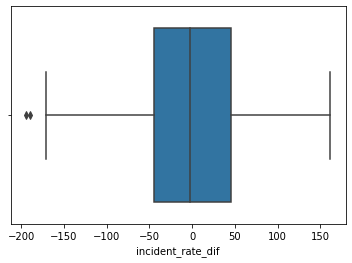


Sample distribution for 04-14-2020:
All incident rate change, NOT FILTERED


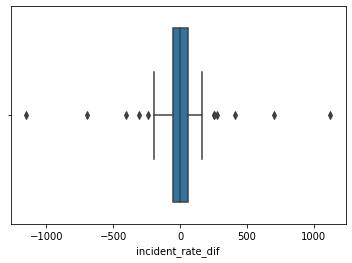

In [15]:
# take a look at distribution plots
apr14 = class_d[2]
print("Sample distribution for 04-14-2020:\nIncident rate change where NOT IN RISK ")
sns.boxplot(apr14.loc[apr14.in_risk.values == 0, 'incident_rate_dif'])
plt.show()
print("\nSample distribution for 04-14-2020:\nAll incident rate change, NOT FILTERED")
sns.boxplot(apr14['incident_rate_dif'])
plt.show()

<p> After classifying into "in risk" and "not in risk", distribution looks much approachable and seems more appropriate for aggregation step

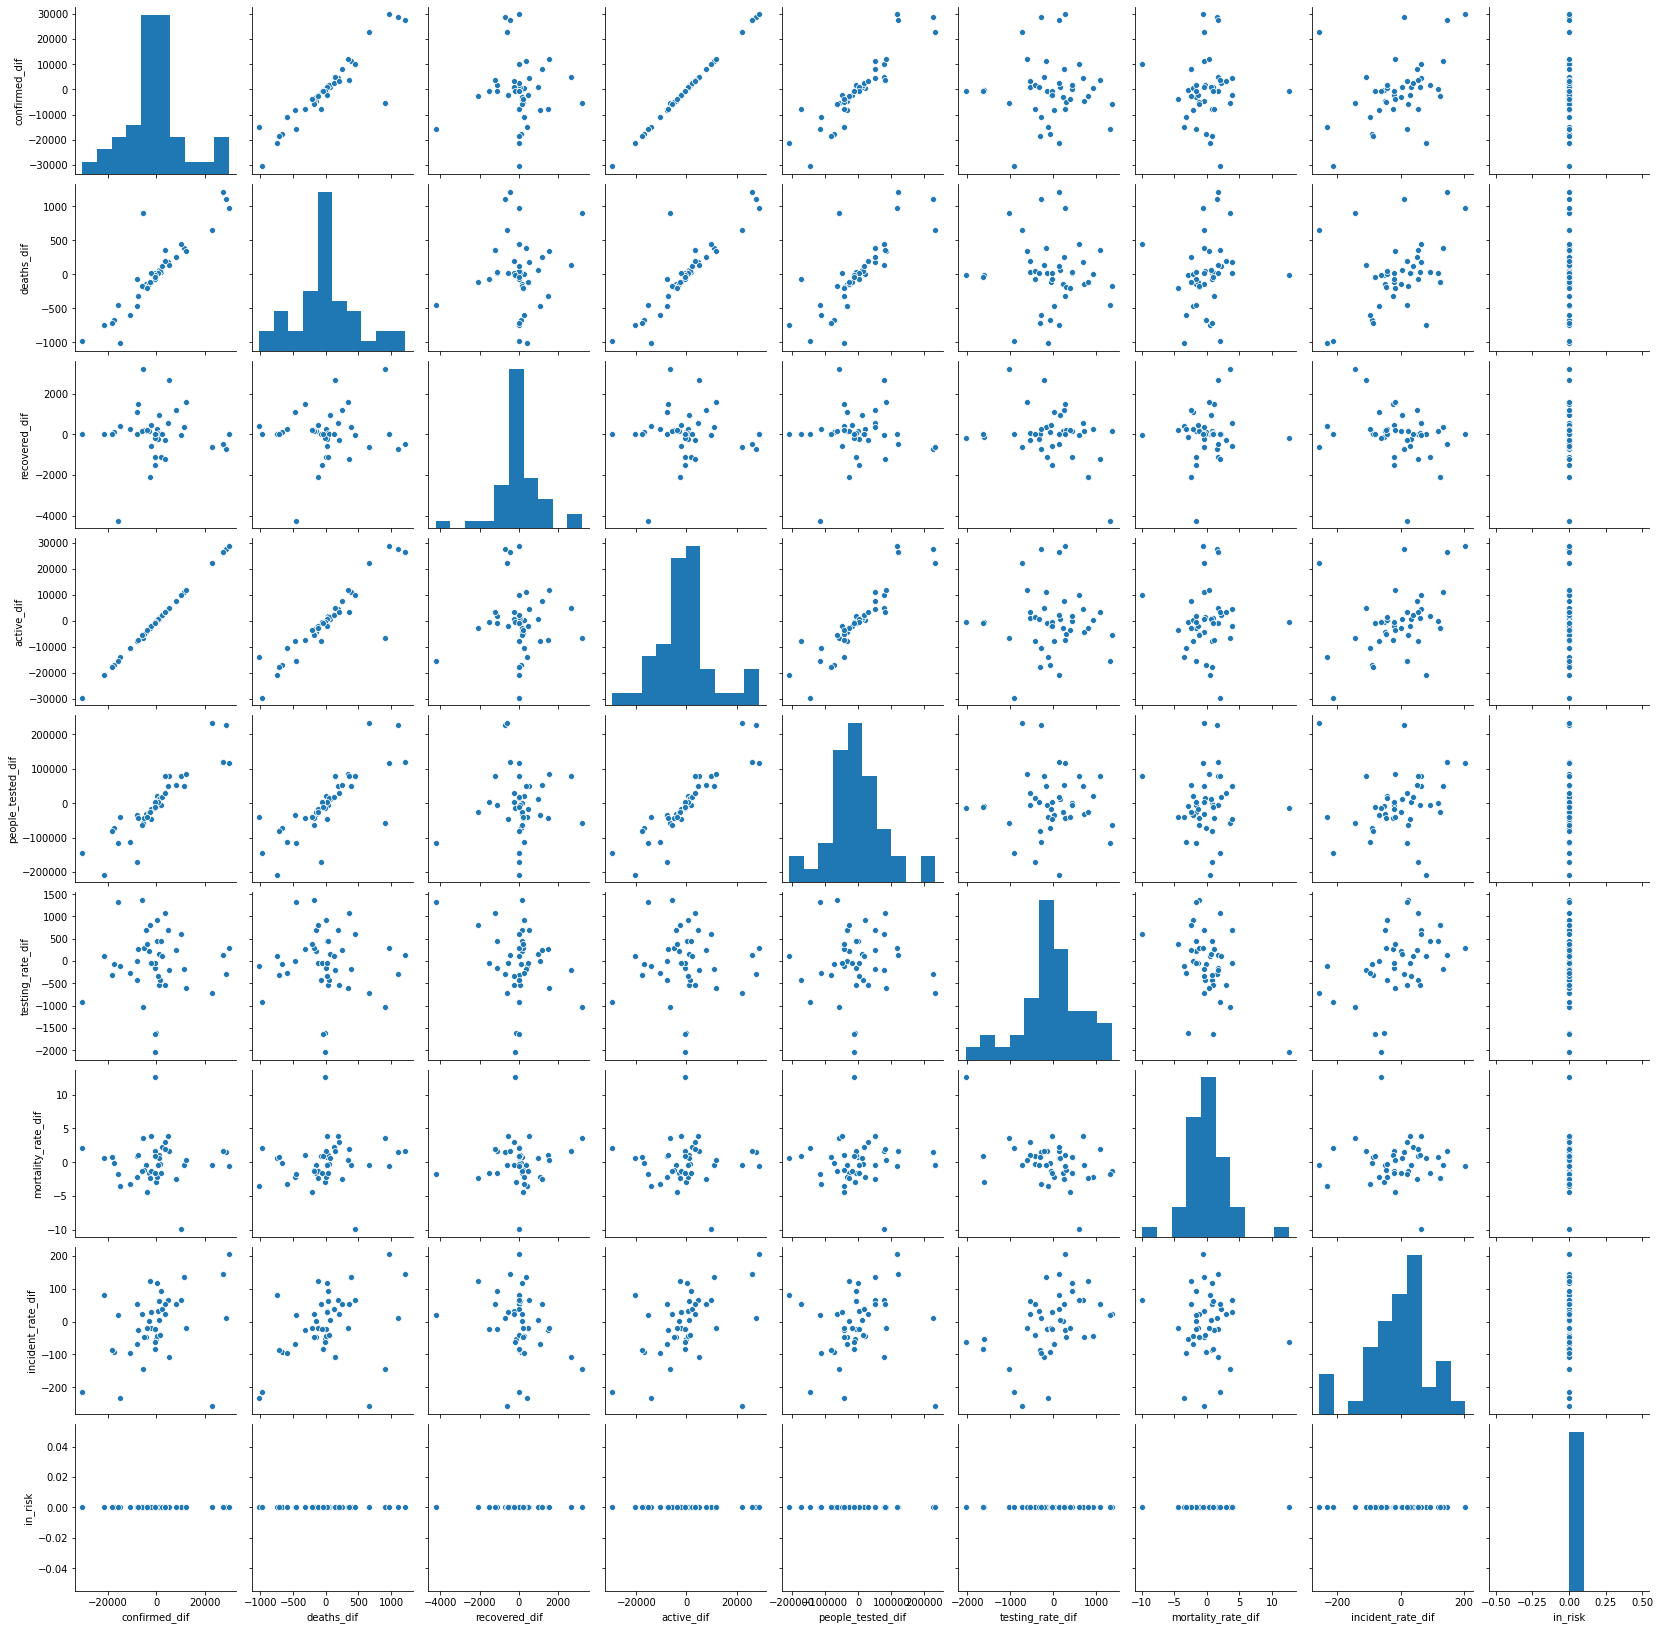

In [16]:
# aggregate mean by classification: multiple linreg each day first??
apr18 = class_d[6]
no_risk = apr18[apr18['in_risk']==0]
sns.pairplot(no_risk)

In [17]:
no_risk.corr()

,confirmed_dif,deaths_dif,recovered_dif,active_dif,people_tested_dif,testing_rate_dif,mortality_rate_dif,incident_rate_dif,in_risk
confirmed_dif,1.000000,0.909169,0.027660,0.999853,0.903397,-0.001812,0.018460,0.403334,NaN
deaths_dif,0.909169,1.000000,0.104259,0.901896,0.779609,-0.042093,0.146956,0.399851,NaN
recovered_dif,0.027660,0.104259,1.000000,0.024399,0.049639,-0.294520,0.107155,-0.264552,NaN
active_dif,0.999853,0.901896,0.024399,1.000000,0.904982,-0.000146,0.013098,0.401910,NaN
people_tested_dif,0.903397,0.779609,0.049639,0.904982,1.000000,-0.017806,0.006675,0.116473,NaN
testing_rate_dif,-0.001812,-0.042093,-0.294520,-0.000146,-0.017806,1.000000,-0.432602,0.434855,NaN
mortality_rate_dif,0.018460,0.146956,0.107155,0.013098,0.006675,-0.432602,1.000000,-0.045955,NaN
incident_rate_dif,0.403334,0.399851,-0.264552,0.401910,0.116473,0.434855,-0.045955,1.000000,NaN
in_risk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
